In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
from sklearn.neighbors import NearestNeighbors
properati = pd.read_csv('datos/properati_final.csv',error_bad_lines=False)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,IsolationForest
from sklearn.preprocessing import RobustScaler  
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

import scoring as score # para hacer los reportes de puntajes
from time import time

<IPython.core.display.Javascript object>

In [10]:
#paso features con strings a numericos
le_barrio = preprocessing.LabelEncoder()
barrios=properati['state_name']
le_barrio.fit(barrios)
properati['state_name'] = le_barrio.transform(barrios)
#test_samples['state_name']=le_barrio.transform(test_samples['state_name'])

le_zona = preprocessing.LabelEncoder()
#zona=pd.concat([properati['place_name'],test_samples['place_name']])
zona=properati['place_name']
le_zona.fit(zona)
properati['place_name'] = le_zona.transform(properati['place_name'])
#test_samples['place_name'] = le_zona.transform(test_samples['place_name'])


le_tipo = preprocessing.LabelEncoder()
tipos_prop=properati['property_type']
le_tipo.fit(tipos_prop)
properati['property_type'] = le_tipo.transform(tipos_prop)
#test_samples['property_type']=le_tipo.transform(test_samples['property_type'])

# Ejemplo trivial KNN con cross validation (CV)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
#preparo set de datos
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3])
neigh = KNeighborsRegressor(n_neighbors=2,n_jobs=-1)

#preparo lista de scores
scores = []

#spliteo en set de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3 ) # al asignarle random_state devuelve siempre lo mismo 
#entreno el set y veo el puntaje que tiene sobre el test
reg=neigh.fit(X_train, y_train)
print (X_test)
#prediccion=reg.predict(X_test)
#print (prediccion)
print (y_test)
print (reg.score(X_test,y_test))


[[-1. -1.]
 [ 2.  2.]
 [ 0.  0.]
 [ 1.  1.]
 [-1. -1.]]
[2 3 0 1 2]
1.0


## CV varias veces en ejemplo anterior

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
#preparo set de datos
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3])
neigh = KNeighborsRegressor(n_neighbors=2,n_jobs=-1)

#preparo lista de scores
scores = []

for i in range(0,10): # lo pruebo varias veces
    #spliteo en set de entrenamiento y de prueba
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5 ) # al asignarle random_state devuelve siempre lo mismo 
    #entreno el set y veo el puntaje que tiene sobre el test
    reg=neigh.fit(X_train, y_train)
    scores.append(reg.score(X_train,y_train))
print(scores) 
print(np.mean(scores))

[0.86842105263157898, 0.8666666666666667, 1.0, 0.89873417721518989, 0.96825396825396826, 0.75, 0.91578947368421049, 1.0, 0.97894736842105268, 1.0]
0.924681270687


# Plot de los diferentes puntajes segun K

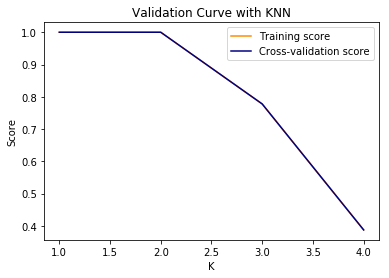

In [84]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

#preparo set de datos
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.],[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3,0, 1, 2, 3])

param_range=range(1,5)
train_scores, test_scores = validation_curve(
KNeighborsRegressor(), X, y, param_name="n_neighbors",param_range=param_range,
cv=2, n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve with KNN")
plt.xlabel("K")
plt.ylabel("Score")

plt.plot(param_range, train_scores_mean, label="Training score",
color="darkorange")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
color="navy")

plt.legend(loc="best")
plt.show()

###  Training vs CV score

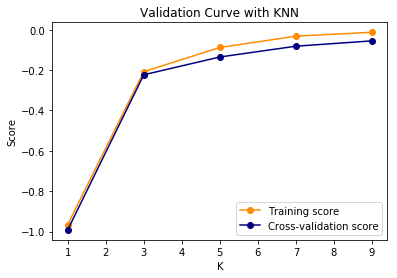

In [25]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsRegressor

#preparo set de datos
X = zip(properati['dist_a_subte'],properati['dist_a_subte'])
y = properati['price_per_m2']

param_range=range(1,10,2)
train_scores, test_scores = validation_curve(
KNeighborsRegressor(), X, y, param_name="n_neighbors",param_range=param_range,
cv=2,scoring="r2" ,n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.title("Validation Curve with KNN")
plt.xlabel("K")
plt.ylabel("Score")

plt.plot(param_range, train_scores_mean, label="Training score",
color="darkorange",marker="o")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
color="navy",marker="o")

plt.legend(loc="best")
plt.show()


### Probe escalando los datos, y tampoco funciona

In [12]:
%%notify

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

from sklearn.preprocessing import StandardScaler  
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#preparo set de datos
X = zip(properati['surface_total_in_m2'],\
        properati['surface_covered_in_m2'],properati["property_type"],properati['state_name'],properati['place_name'])
y = properati['price_aprox_usd']


neigh = KNeighborsRegressor(n_jobs=-1)

n_neighbors = np.arange(10,200,10)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

param_grid = {"n_neighbors":n_neighbors}

search = GridSearchCV(neigh, param_grid=param_grid ,cv=5) #refit deja el estimador fiteado con los mejores hiperparametros
start = time()
search.fit(X_train, y_train)

print("GridSearchCV duro %.2f segundos para %d candidatos a hiper-parametros."
    % (time() - start, len(search.cv_results_['params'])))
print("")
score.report_single(search.cv_results_)


GridSearchCV duro 269.70 segundos para 19 candidatos a hiper-parametros.

Puesto: 1
Promedio training score: 0.551 (std: 0.054)
Promedio validation score: 0.552 (std: 0.130)
Promedio fit time: 0.198s
Hiper-parametros: {'n_neighbors': 20}

Puesto: 2
Promedio training score: 0.532 (std: 0.053)
Promedio validation score: 0.549 (std: 0.131)
Promedio fit time: 0.198s
Hiper-parametros: {'n_neighbors': 30}

Puesto: 3
Promedio training score: 0.596 (std: 0.052)
Promedio validation score: 0.546 (std: 0.134)
Promedio fit time: 0.192s
Hiper-parametros: {'n_neighbors': 10}

Puesto: 4
Promedio training score: 0.519 (std: 0.051)
Promedio validation score: 0.543 (std: 0.128)
Promedio fit time: 0.191s
Hiper-parametros: {'n_neighbors': 40}

Puesto: 5
Promedio training score: 0.510 (std: 0.052)
Promedio validation score: 0.540 (std: 0.125)
Promedio fit time: 0.190s
Hiper-parametros: {'n_neighbors': 50}

Puesto: 6
Promedio training score: 0.504 (std: 0.051)
Promedio validation score: 0.537 (std: 0.121)
P

<IPython.core.display.Javascript object>